<a href="https://colab.research.google.com/github/cristiang26/Laboratorio-Senales/blob/main/TP1/Copia_de_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#!pip install wfdb   #Instalacion en colab
import wfdb
#pip install wfdb #Instalacion en python instalado
import pandas as pd


In [ ]:
wfdb.dl_database('mitdb', dl_dir='mitdb', records=['100']) # Descargamos la base de datos de mitdb con el record 100

record = wfdb.rdrecord('mitdb/100', sampto=60*360) # Creamos el objeto record usando la medicion mitdb/100


Generating record list for: 100
Generating list of all files for: 100
Finished downloading files


# Grafica señal MLII


21600


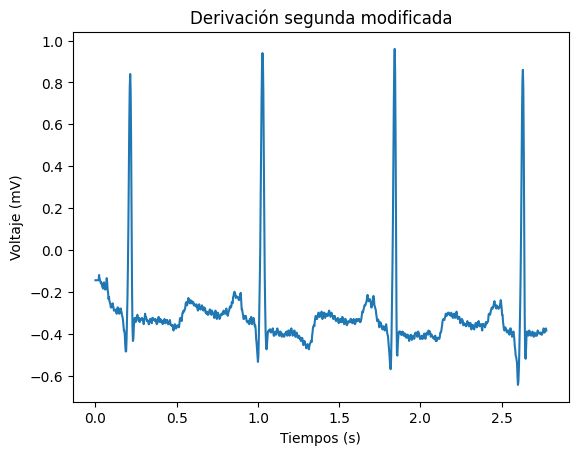

In [ ]:

signals = record.p_signal # Transformamos record al array signals
MliiSignal = signals[:,0] # Escogemos solo la señal de la columna 0

fs = 360 #Definimos fs (Frecuencia de muestreo)
nSamples  = 360*60 # Calculamos la cantidad de muestras para 60 segundos
t = [] #Creamos array vacio

for i in range(nSamples):
  tiempo = i * (1 / fs) #Multiplicamos i * Periodo de muestreo
  t.append(tiempo) #agregamos a t

print(len(t))

plt.title("Derivación segunda modificada")
plt.xlabel("Tiempos (s)")
plt.ylabel("Voltaje (mV)")
plt.plot(t[0:1000],MliiSignal[0:1000])



# Calculo de variables estadisticas

## Media

In [ ]:
# Tenemos MliiSignal y t

acumulador = 0

for i in MliiSignal:
  acumulador = acumulador + i

media = acumulador/nSamples

print("Media:", media)


Media: -0.33634791666666564


## Desviación estándar

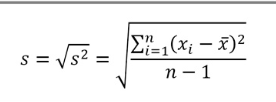

In [ ]:
# Tenemos MliiSignal y t

acumulador = 0

for i in MliiSignal:
  acumulador = acumulador + (i - media)**2

varianza = acumulador/(nSamples - 1)
sd = varianza**(0.5)

print("Desviación Estandar:", sd)

Desviación Estandar: 0.17561972579326307


## Coeficiente de variación

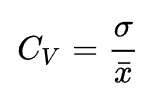

In [ ]:
Cv= sd/(media)
print("Coeficiente de variación:",Cv)

Coeficiente de variación: -0.5221370999818301


## Histograma


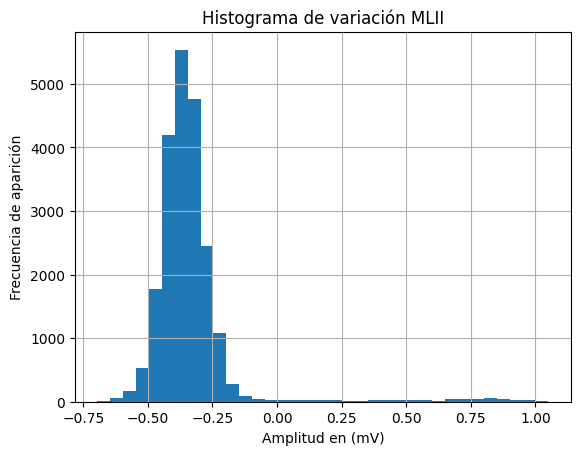

In [ ]:
plt.hist(MliiSignal,bins=35)
plt.title("Histograma de variación MLII")
plt.xlabel("Amplitud en (mV)")
plt.ylabel("Frecuencia de aparición")
plt.grid(True)

##Función de probabilidad

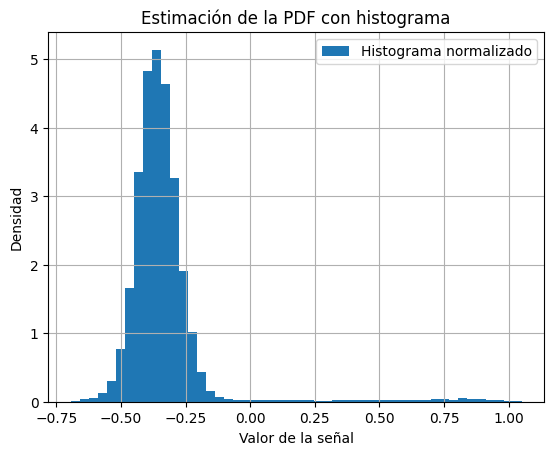

In [ ]:
plt.hist(MliiSignal, bins=50, density=True, label='Histograma normalizado')
plt.title('Estimación de la PDF con histograma')
plt.xlabel('Valor de la señal')
plt.ylabel('Densidad')
plt.legend()
plt.grid()
plt.show()

##Curtosis
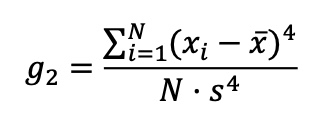

In [ ]:
acumulador = 0

for i in MliiSignal:
  acumulador = acumulador + (i - media)**4

g2= acumulador/(nSamples*sd**4)-3
print("Curtosis:",g2)
print("Leptocúrtica")



Curtosis: 26.565687328943497
Leptocúrtica


#Resolución con Funciones

Media: -0.33634791666666664
Desviación estándar: 0.17561566047477958
Coeficiente de variación: -0.5221250133349905


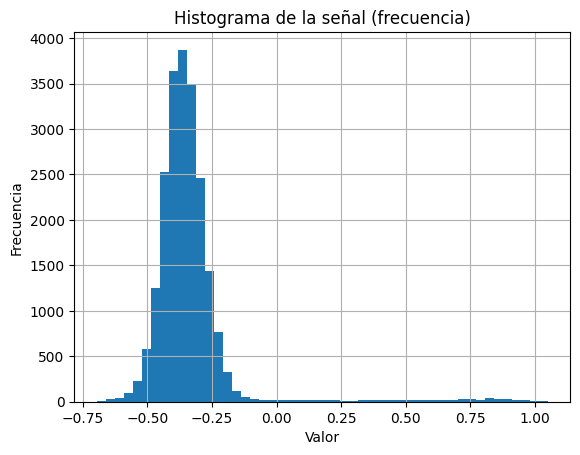

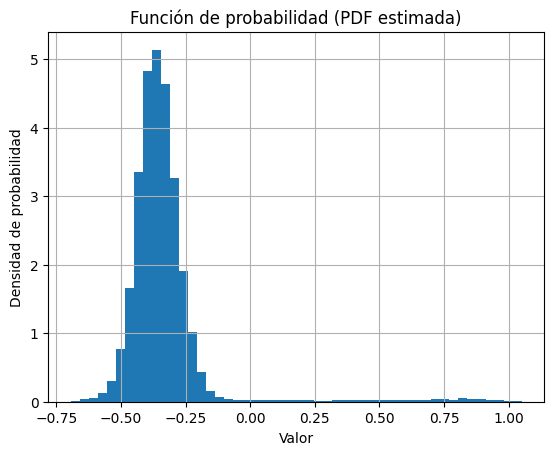

Curtosis (exceso): 26.568425082705314


In [ ]:
from scipy.stats import kurtosis
MliiSignal = np.array(MliiSignal)

# a. Media de la señal
media = np.mean(MliiSignal)
print("Media:", media)

# b. Desviación estándar
desviacionStd = np.std(MliiSignal)
print("Desviación estándar:", desviacionStd)

# c. Coeficiente de variación
coefVar = desviacionStd / media
print("Coeficiente de variación:", coefVar)

# d. Histograma (frecuencia)
plt.hist(MliiSignal, bins=50)
plt.title('Histograma de la señal (frecuencia)')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# e. Función de probabilidad (PDF estimada)
plt.hist(MliiSignal, bins=50, density=True)
plt.title('Función de probabilidad (PDF estimada)')
plt.xlabel('Valor')
plt.ylabel('Densidad de probabilidad')
plt.grid(True)
plt.show()

# f. Curtosis (exceso, ya incluye el -3)
curtosisValor = kurtosis(MliiSignal)
print("Curtosis (exceso):",curtosisValor)